## Dataset: Prosper Loan Dataset
Intern : Deepak Prajapat
Task   : Preprocessing & EDA     

In [1]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [2]:
pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import category_encoders as ce


In [4]:
df= pd.read_csv("prosperLoanData.csv")
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [31]:
def encode_loan_status(row):
    if row["LoanCurrentDaysDelinquent"] > 0:
        return "Delinquent"
    else:
        return "Non-Delinquent"

In [6]:
df["EncodedLoanStatus"] = df.apply(encode_loan_status, axis=1)

binary_encoder = ce.BinaryEncoder(cols=["EncodedLoanStatus"])
df_encoded = binary_encoder.fit_transform(df)

In [7]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,EncodedLoanStatus
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,Non-Delinquent
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,Non-Delinquent
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,Non-Delinquent
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,Non-Delinquent
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,Non-Delinquent


In [8]:
df_encoded = df_encoded.drop(["LoanStatus", "LoanCurrentDaysDelinquent"], axis=1)


In [9]:
print(df_encoded.head())


                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term           ClosedDate  BorrowerAPR  BorrowerRate  \
0           C    36  2009-08-14 00:00:00      0.16516        0.1580   
1         NaN    36                  NaN      0.12016        0.0920   
2          HR    36  2009-12-17 00:00:00      0.28269        0.2750   
3         NaN    36                  NaN      0.12528        0.0974   
4         NaN    36                  NaN      0.24614        0.2085   

   LenderYield  EstimatedEffectiveYield  ...  LP_GrossPrincipalLoss  \
0       0.1380                      NaN  ... 

In [10]:
# Create a new column called "LoanStatus"
df["LoanStatus"] = df["LoanCurrentDaysDelinquent"] > 180

In [11]:
# Replace the values in the "LoanStatus" column
df["LoanStatus"] = df["LoanStatus"].replace({True: 0, False: 1})

In [12]:
# Print the first few rows of the dataset
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,EncodedLoanStatus
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,1,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,Non-Delinquent
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,1,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,Non-Delinquent
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,1,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,Non-Delinquent
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,1,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,Non-Delinquent
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,1,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,Non-Delinquent


In [13]:
df.isnull().sum()


ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
EncodedLoanStatus                  0
Length: 82, dtype: int64

In [14]:
df["CreditGrade"] = df["CreditGrade"].fillna(df["CreditGrade"].mode()[0])


In [15]:
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,EncodedLoanStatus
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,1,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,Non-Delinquent
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,C,36,1,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,Non-Delinquent
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,1,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,Non-Delinquent
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,C,36,1,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,Non-Delinquent
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,C,36,1,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,Non-Delinquent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,C,36,1,NaN,0.22354,0.1864,0.1764,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,Non-Delinquent
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,C,36,1,NaN,0.13220,0.1110,0.1010,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22,Non-Delinquent
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,C,60,1,NaN,0.23984,0.2150,0.2050,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119,Non-Delinquent
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,C,60,1,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274,Non-Delinquent


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 82 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          113937 non-null  object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  int64  
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [17]:
import pandas as pd

# Calculate the percentage of missing values for each column
missing_values = df.isna().sum() / len(df)

# Find the columns with more than 75% missing values
columns_with_more_than_75_missing_values = missing_values[missing_values > 0.75].index

# Print the names of the columns with more than 75% missing values
print(columns_with_more_than_75_missing_values)

Index(['GroupKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
       'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
       'LoanFirstDefaultedCycleNumber'],
      dtype='object')


In [18]:
# Drop the columns
df = df.drop(['GroupKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
       'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
       'LoanFirstDefaultedCycleNumber'], axis=1)

In [19]:
# Print the first few rows of the dataset
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,EncodedLoanStatus
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,1,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,Non-Delinquent
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,C,36,1,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,Non-Delinquent
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,1,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,Non-Delinquent
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,C,36,1,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,Non-Delinquent
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,C,36,1,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,Non-Delinquent


In [20]:
df.shape

(113937, 72)

In [21]:
df['CreditGrade'].isnull().sum()

0

In [22]:
df.describe()

,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.867795,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.338715,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,1.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,1.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,1.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,1.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


## Exploratary Data Analysis

In [23]:
# Check for missing values
missing_values = df.isna().sum()

In [24]:
# Impute missing values with the mean for numerical columns
for column in df.select_dtypes(include=[np.number]):
    df[column] = df[column].fillna(df[column].mean())

# Impute missing values with the mode for object columns
for column in df.select_dtypes(include=[object]):
    df[column] = df[column].fillna(df[column].mode()[0])

# Print the first few rows of the dataset
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,EncodedLoanStatus
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,1,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,Non-Delinquent
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,C,36,1,2014-03-04 00:00:00,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,Non-Delinquent
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,1,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,Non-Delinquent
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,C,36,1,2014-03-04 00:00:00,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,Non-Delinquent
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,C,36,1,2014-03-04 00:00:00,0.24614,0.2085,0.1985,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,Non-Delinquent


In [25]:
df.isnull().sum()

ListingKey                     0
ListingNumber                  0
ListingCreationDate            0
CreditGrade                    0
Term                           0
                              ..
Recommendations                0
InvestmentFromFriendsCount     0
InvestmentFromFriendsAmount    0
Investors                      0
EncodedLoanStatus              0
Length: 72, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 72 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingKey                          113937 non-null  object 
 1   ListingNumber                       113937 non-null  int64  
 2   ListingCreationDate                 113937 non-null  object 
 3   CreditGrade                         113937 non-null  object 
 4   Term                                113937 non-null  int64  
 5   LoanStatus                          113937 non-null  int64  
 6   ClosedDate                          113937 non-null  object 
 7   BorrowerAPR                         113937 non-null  float64
 8   BorrowerRate                        113937 non-null  float64
 9   LenderYield                         113937 non-null  float64
 10  EstimatedEffectiveYield             113937 non-null  float64
 11  EstimatedLoss             

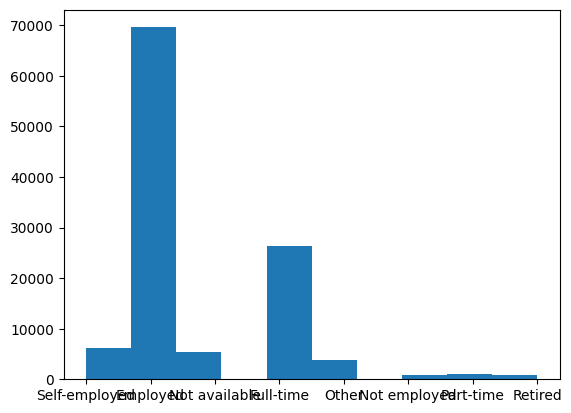

In [27]:
# Plot the distribution of the data
plt.hist(df['EmploymentStatus'])
plt.show()

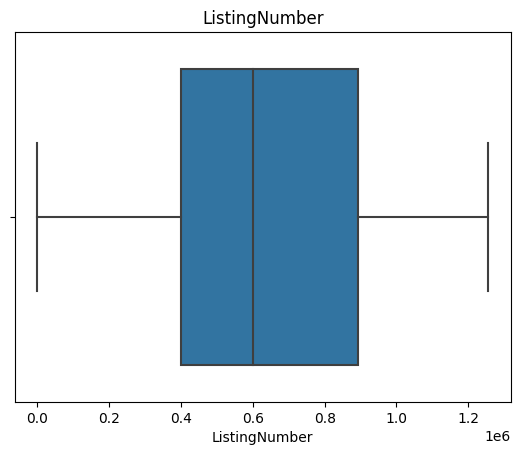

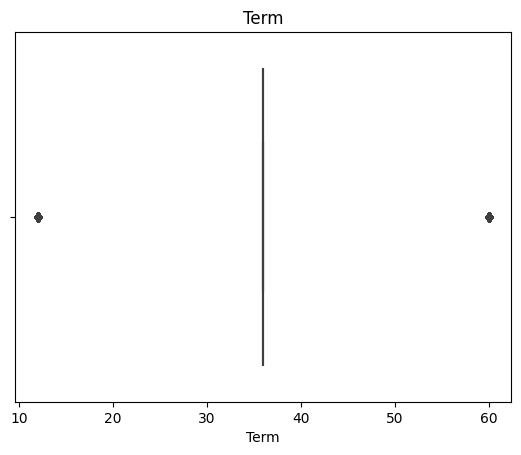

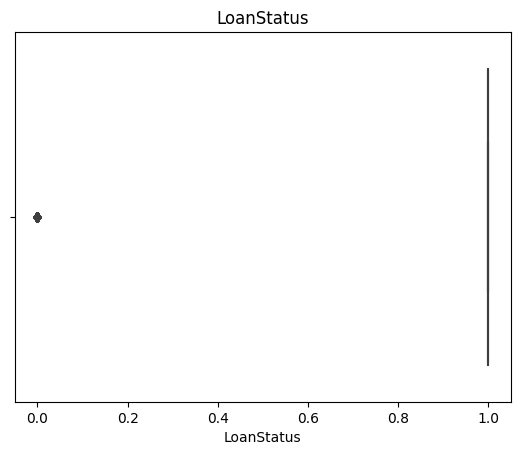

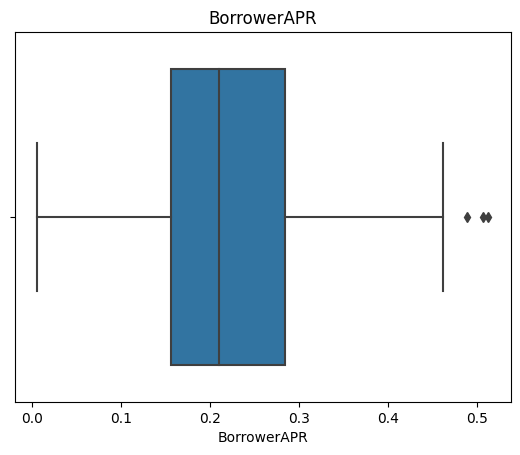

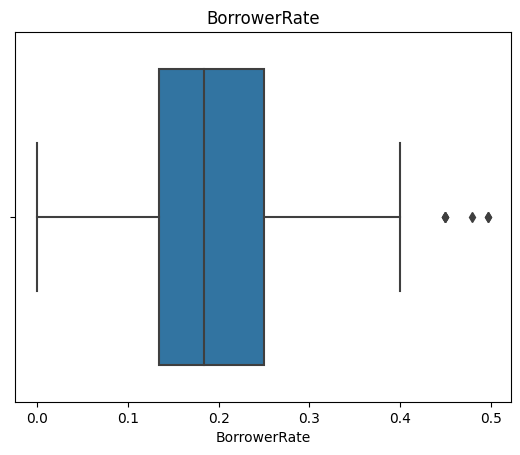

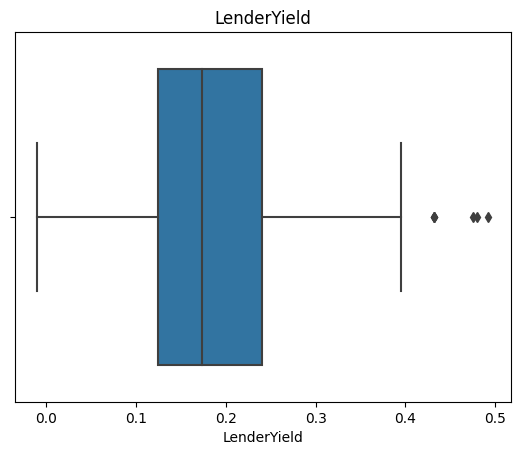

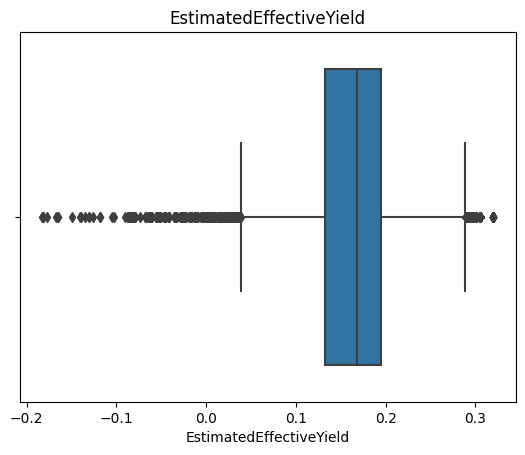

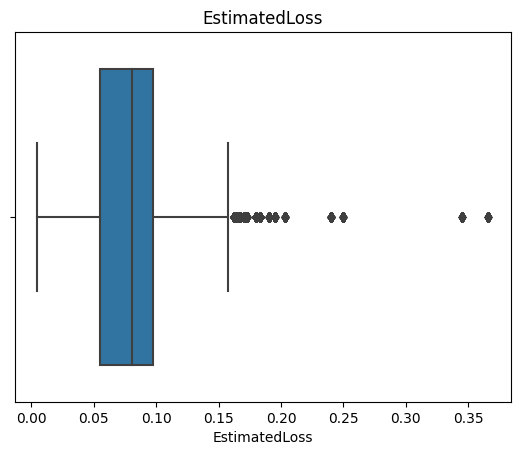

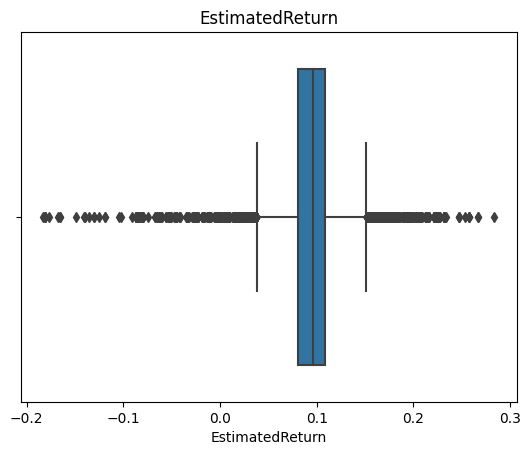

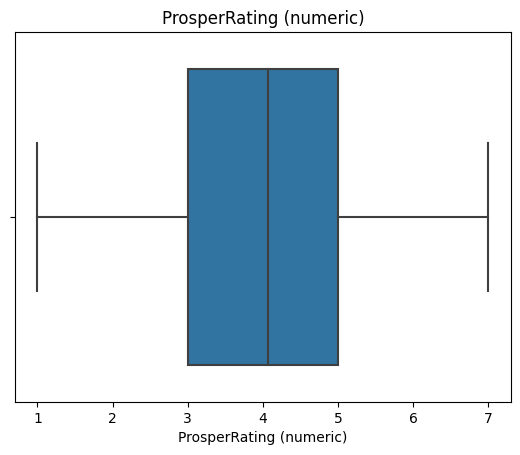

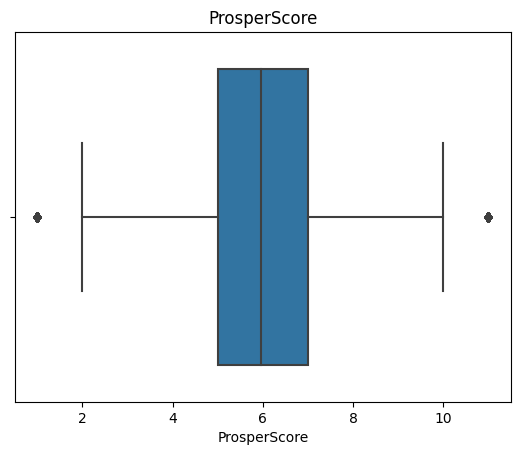

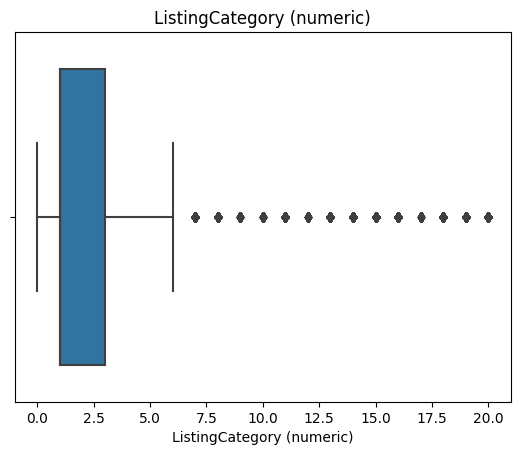

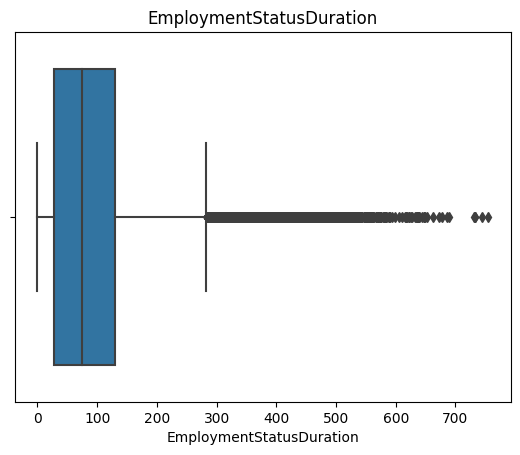

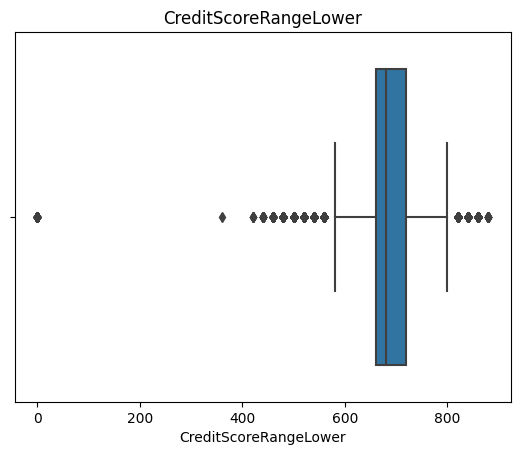

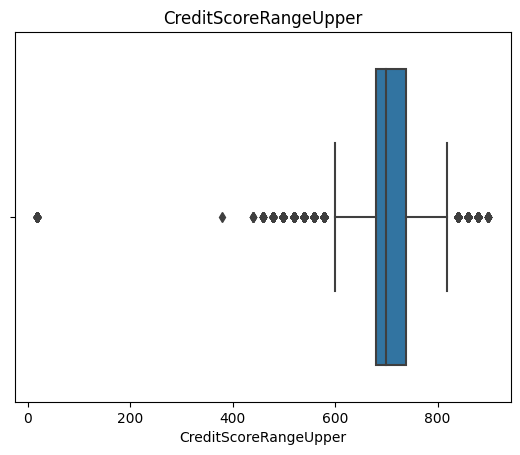

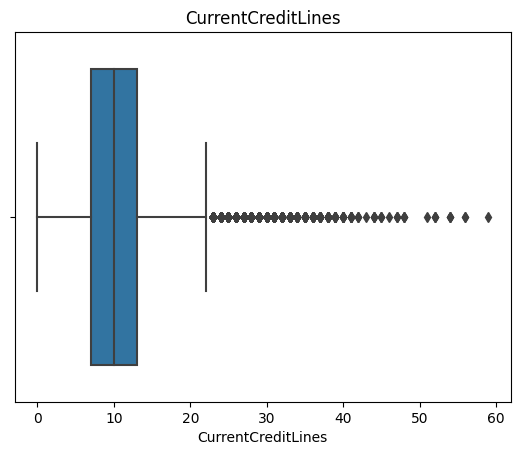

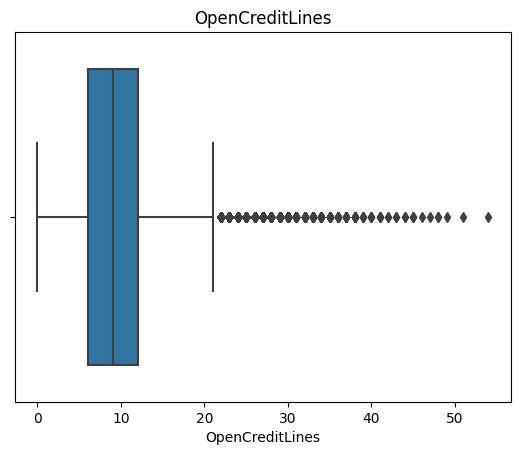

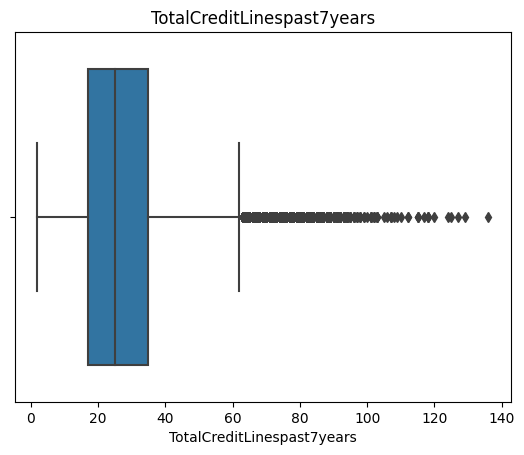

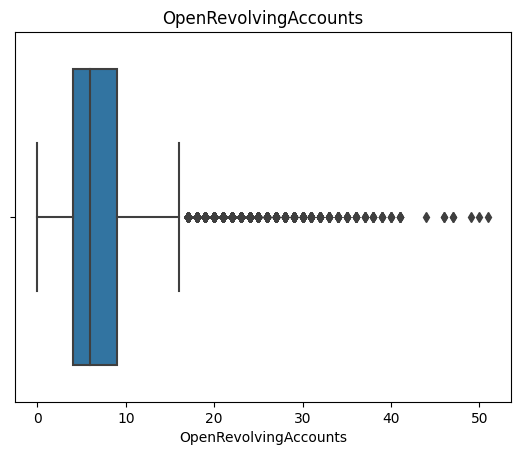

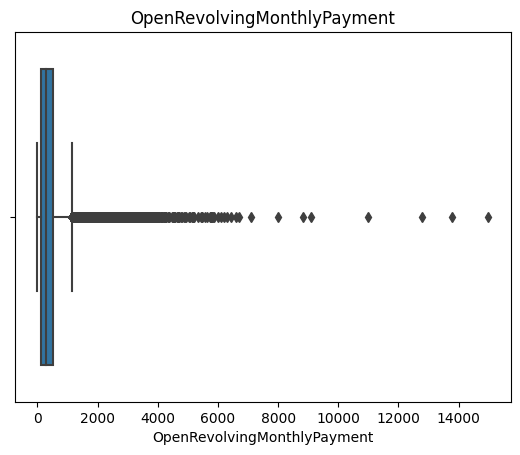

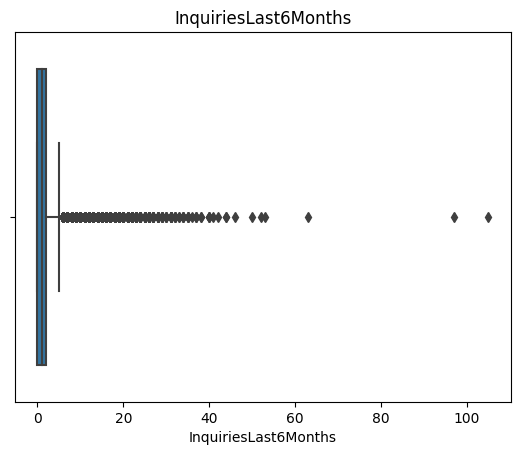

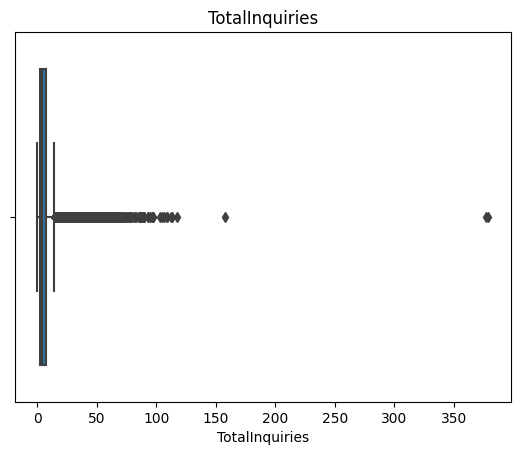

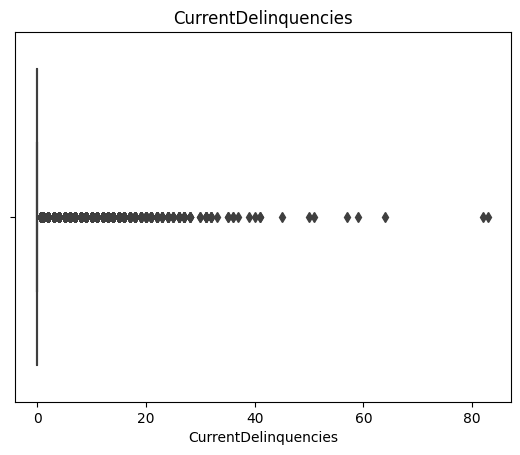

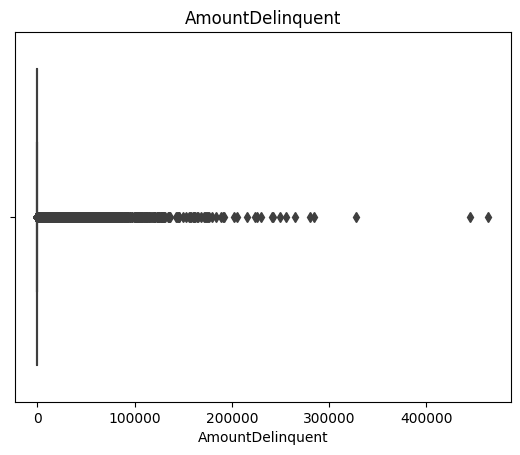

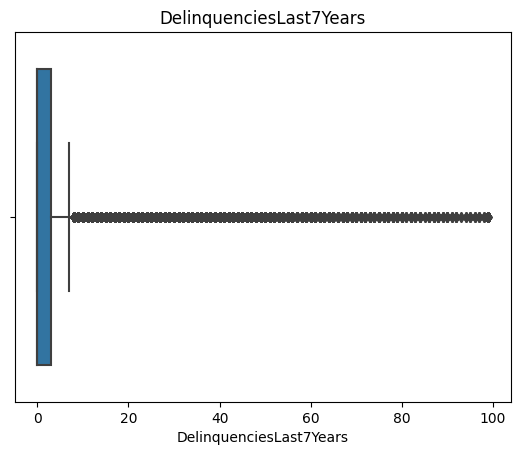

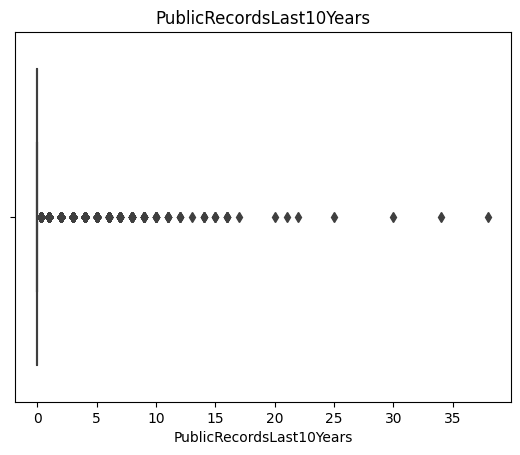

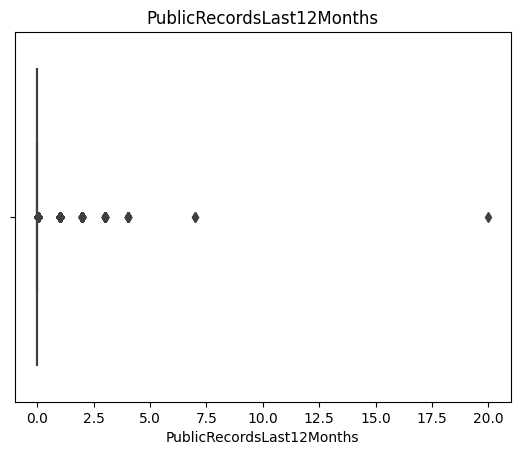

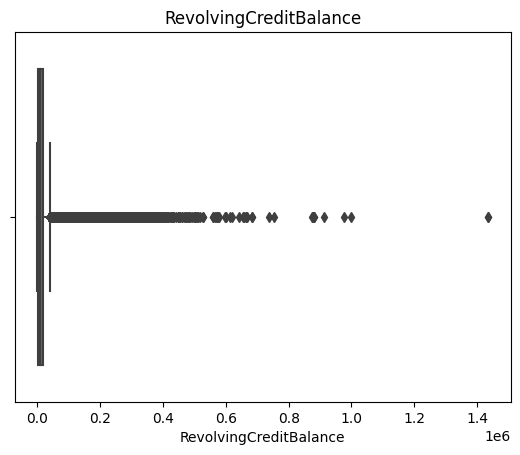

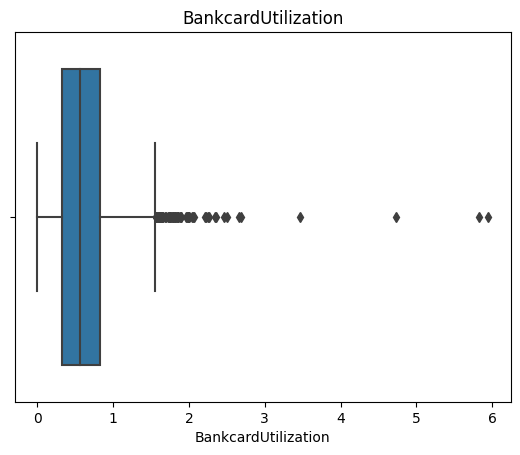

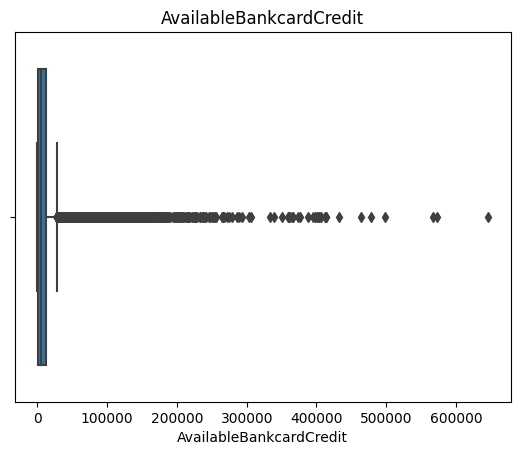

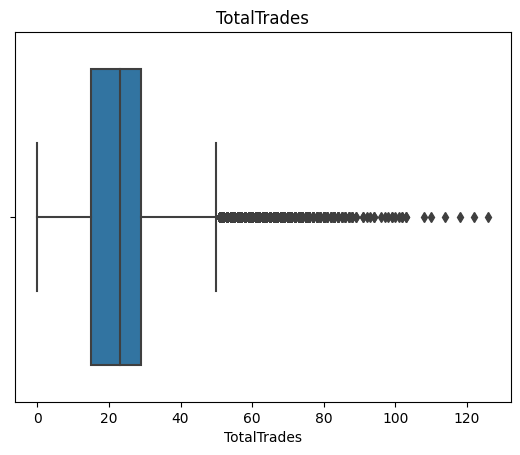

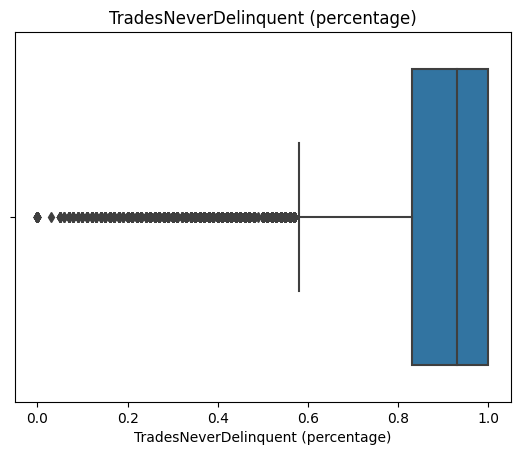

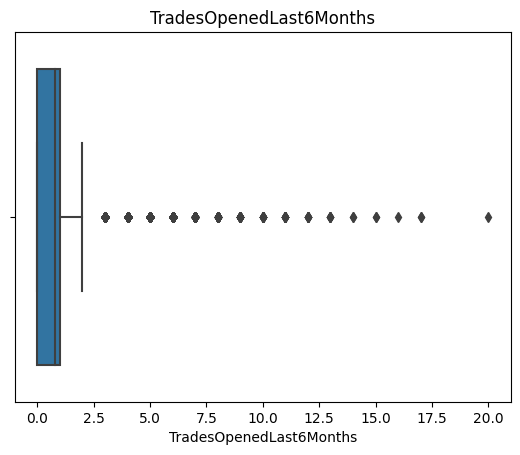

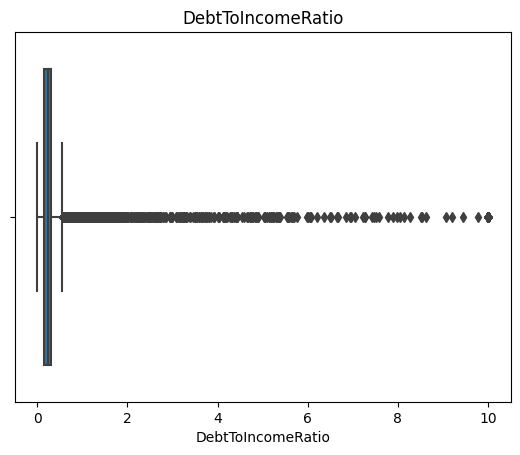

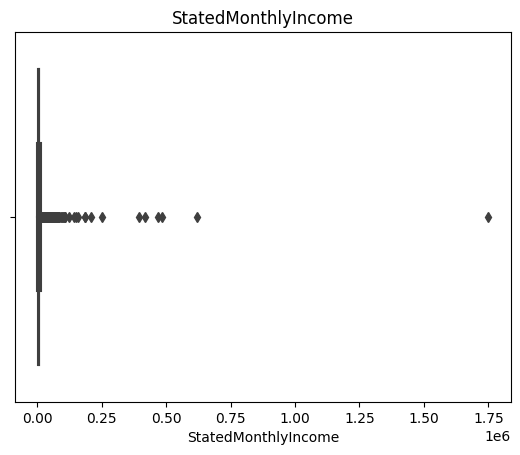

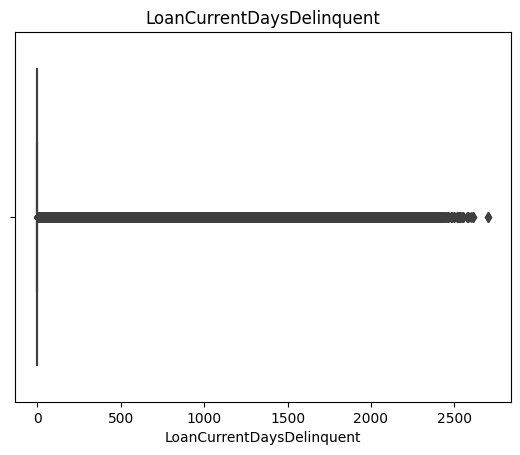

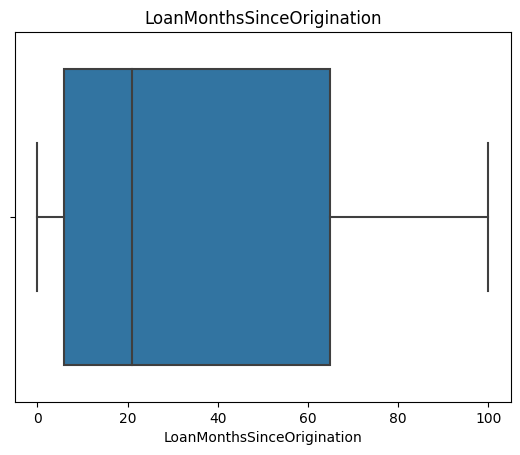

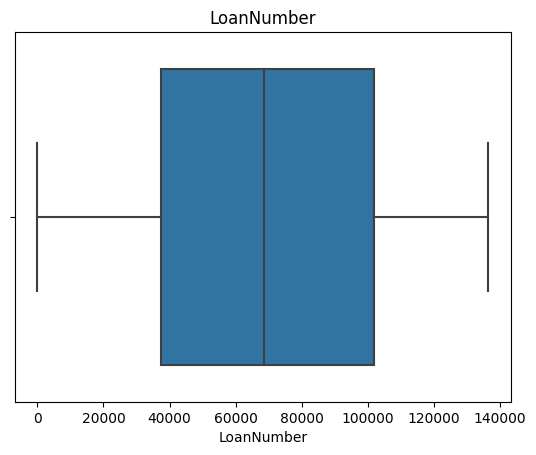

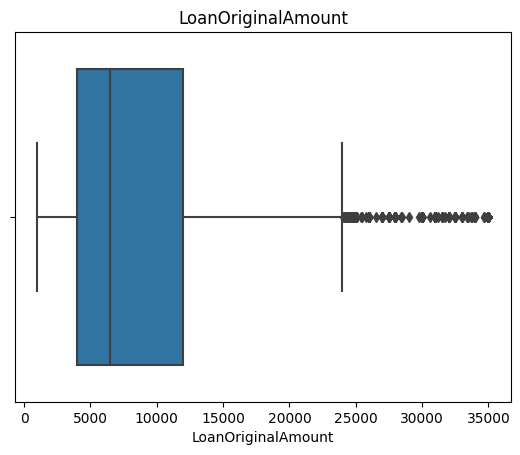

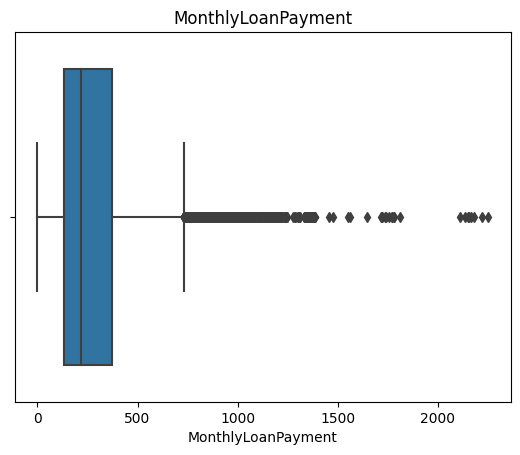

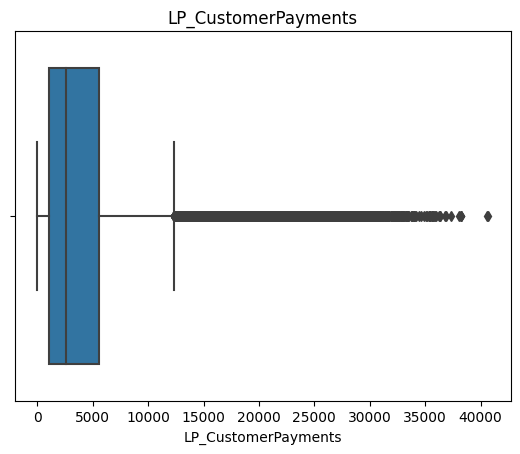

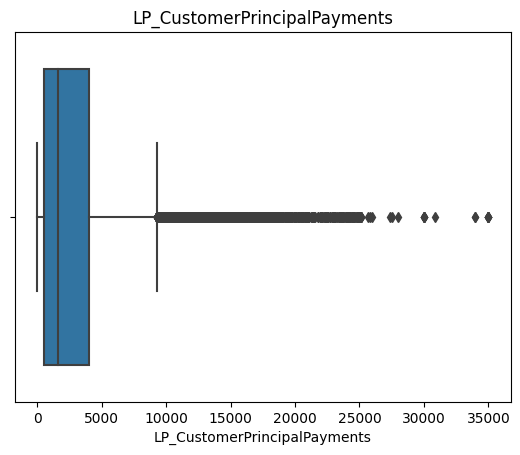

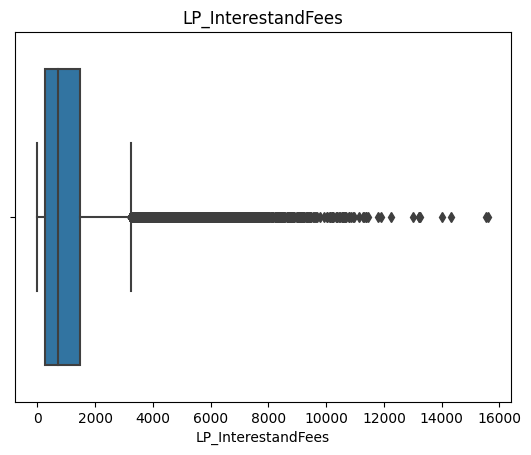

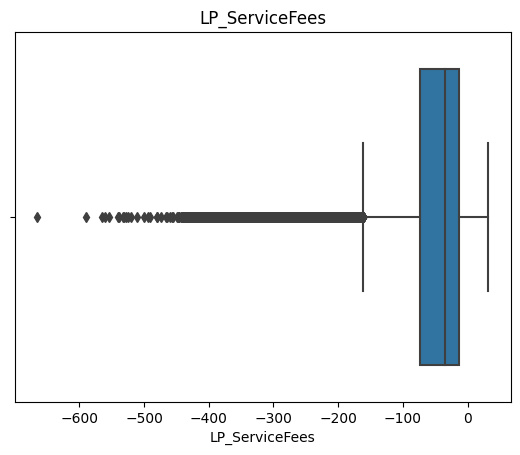

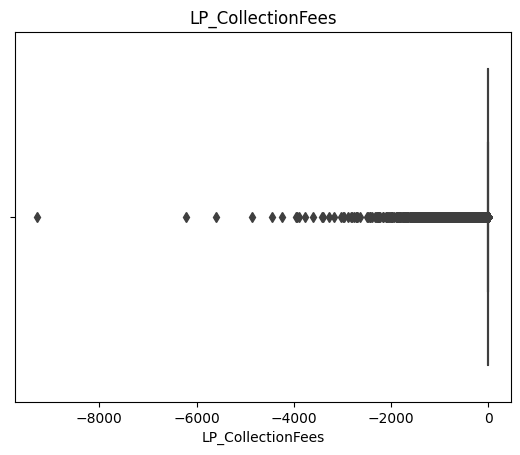

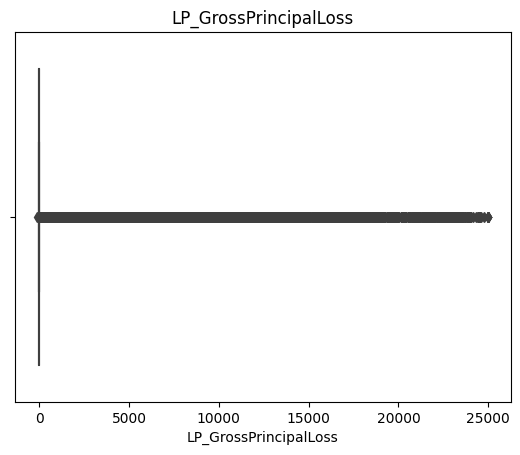

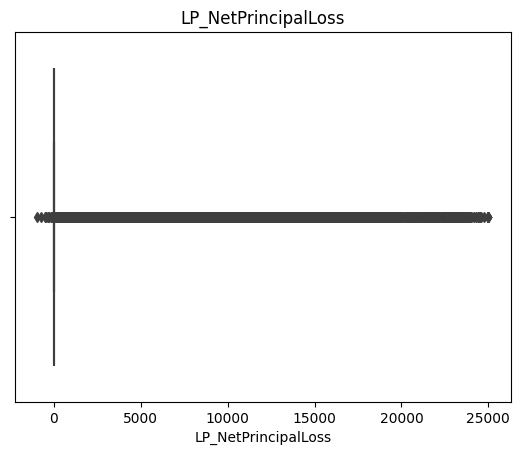

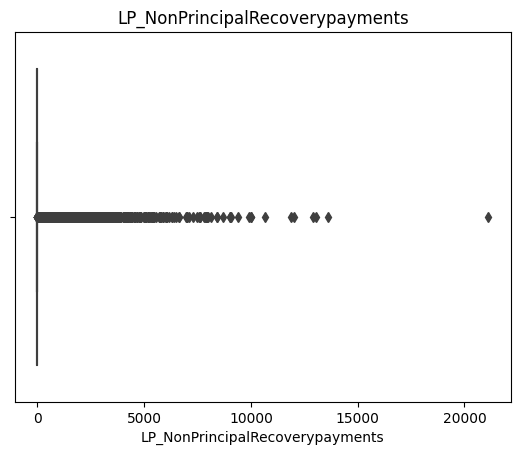

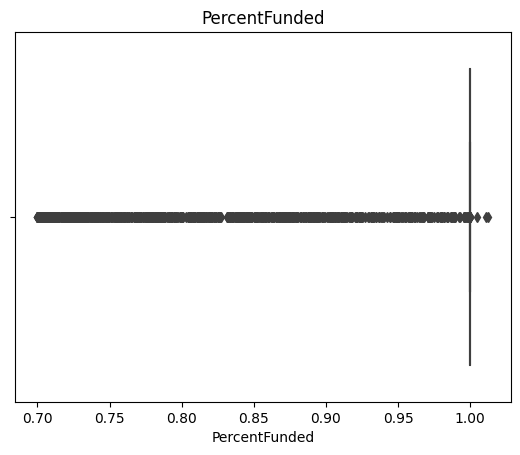

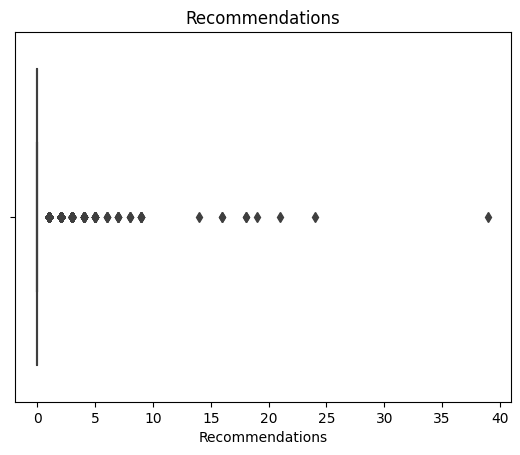

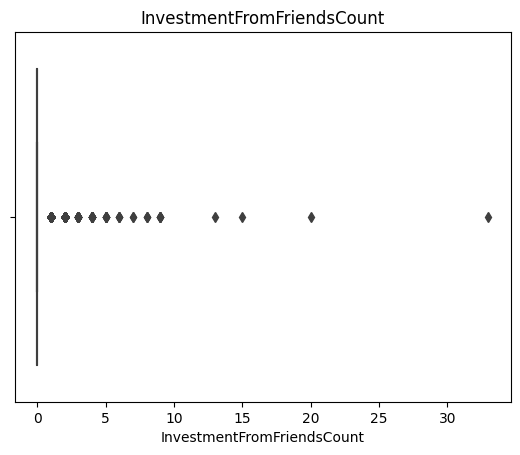

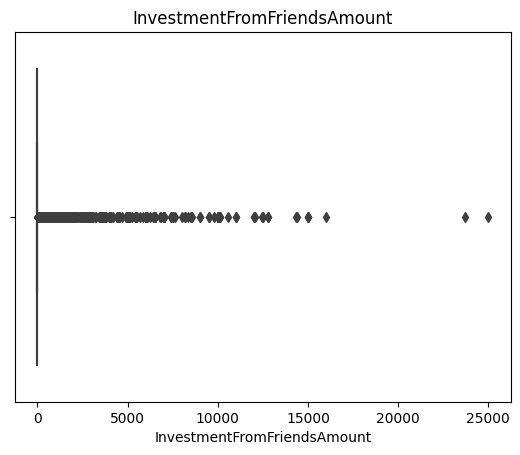

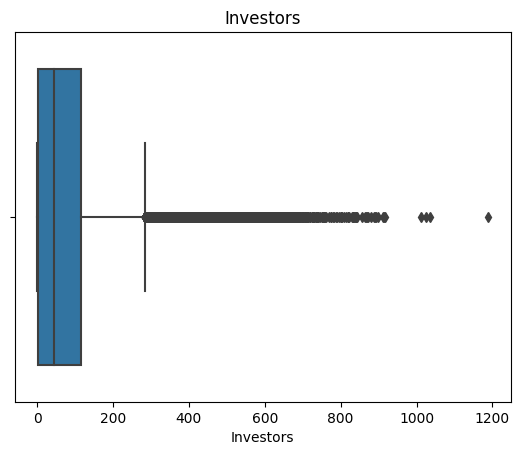

In [28]:
# Visualize the distribution of numerical columns

numerical_columns = df.select_dtypes(include=np.number).columns
for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.show()

In [29]:
corr = df.corr()

C:\Users\deepak parajapt\AppData\Local\Temp\ipykernel_10980\658818363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Figure size 3000x3000 with 0 Axes>

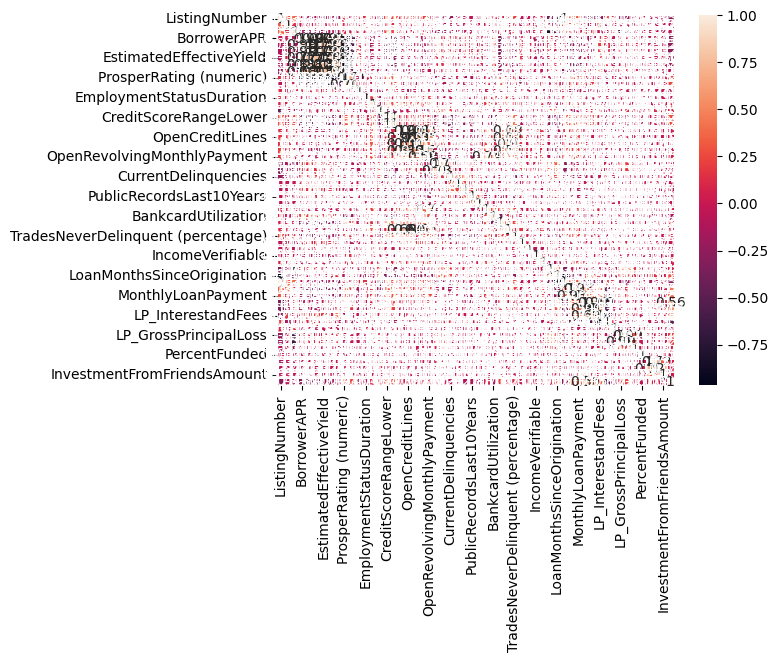

<Figure size 3000x3000 with 0 Axes>

In [30]:
sns.heatmap(corr, annot=True, linewidth=.5)
plt.figure(figsize=(30,30))